In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [5]:
data_path = "F:/datasets/PROJECTS/fiverr/Ganesh/train.csv"
train_data = pd.read_csv(data_path)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as Alley and PoolQC). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove Id and the features with 30% or less NaN values.

In [8]:
# df.count() does not include NaN values
df = train_data[[column for column in df if train_data[column].count() / len(train_data) >= 0.3]]
del df['Id']
print("List of dropped columns:", end=" ")
for c in train_data.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')
train_data = df

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



### Describe the Datasets

In [7]:
print ("Total rows and columns in train dataset respectively: " + str(train_data.shape))
#print ("Total rows and columns in test dataset respectively: " + str(test.shape))

Total rows and columns in train dataset respectively: (1460, 81)


Now lets take a look at how the housing price is distributed

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


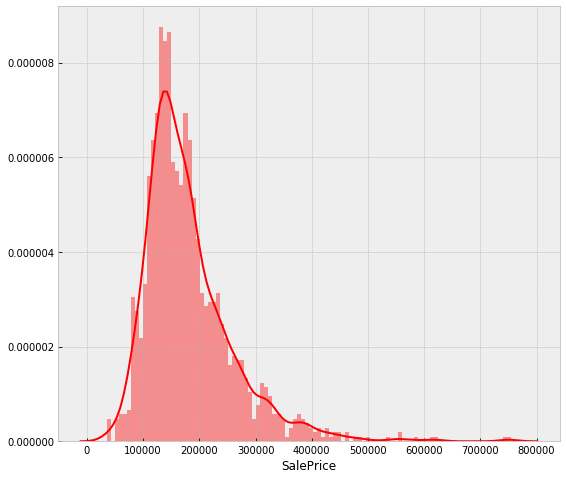

In [10]:
print(train_data['SalePrice'].describe())
plt.figure(figsize = (9, 8))
sns.distplot(train_data['SalePrice'], color = 'r', bins = 100, hist_kws = {'alpha': 0.4});

**With this information we can see that the prices are skewed right and some outliers lies above ~500,000. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`SalePrice`) for machine learning.**

### Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [17]:
df_num = train_data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


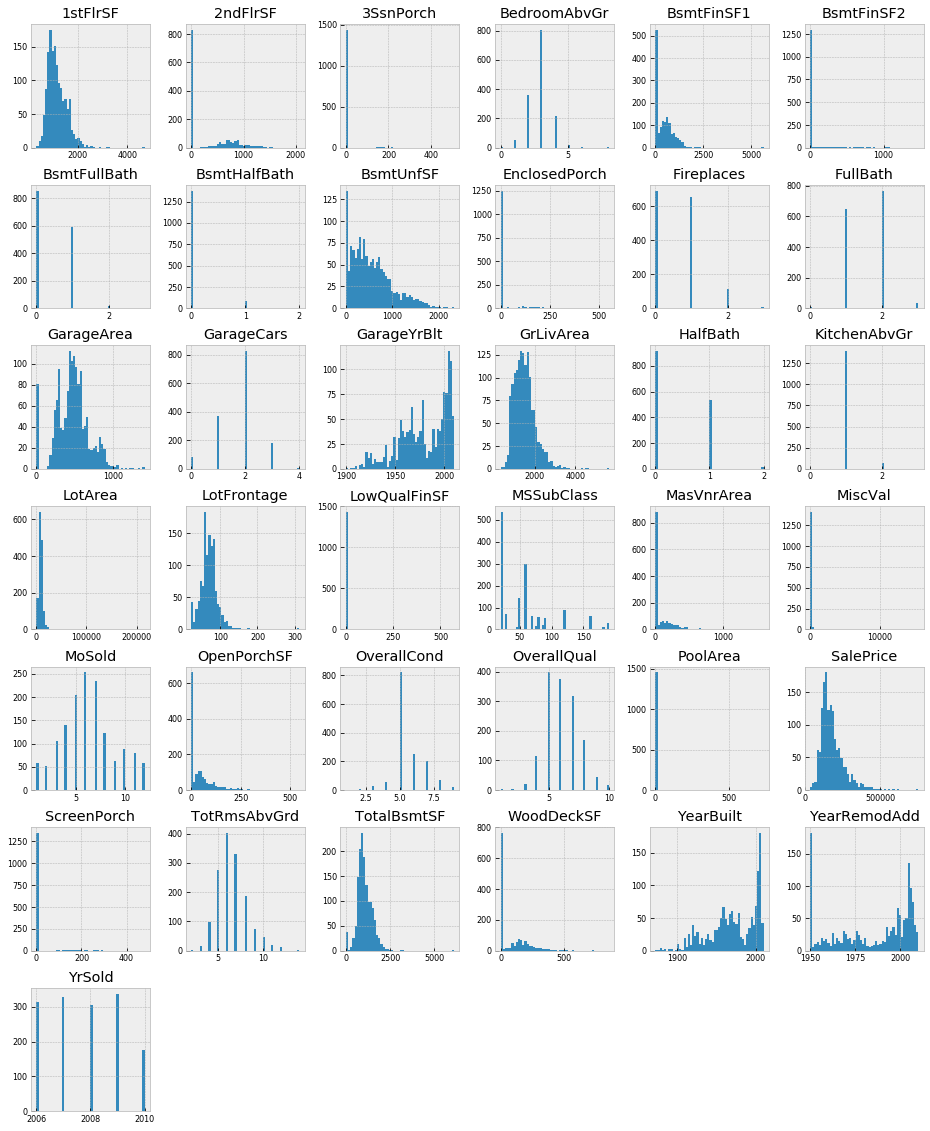

In [20]:
df_num.hist(figsize = (16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8);

Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... seems to share a similar distribution to the one we have with `SalePrice`. Lets see if we can find new clues later.

### Relationship with numerical variables

Let's look at the relationship between the **"SalesPrice"** and other feature columns such as **"GrLiveArea"** and **"TotalBsmtSF"**

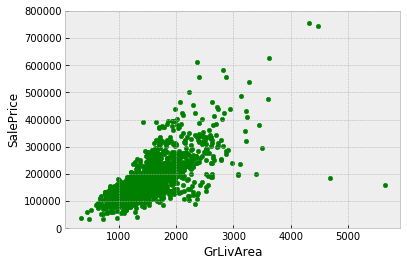

In [15]:
#scatter plot grlivarea/saleprice
data = pd.concat([train_data['SalePrice'], train_data["GrLivArea"]], axis = 1)
data.plot.scatter(x = "GrLivArea", y = 'SalePrice', ylim = (0,800000), c = "g");

Hmmm... It seems that 'SalePrice' and 'GrLivArea' have a good linear relationship.

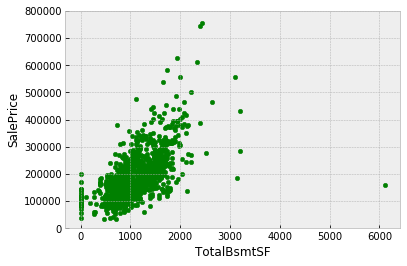

In [16]:
#scatter plot totalbsmtsf/saleprice
data = pd.concat([train_data['SalePrice'], train_data["TotalBsmtSF"]], axis = 1)
data.plot.scatter(x = "TotalBsmtSF", y = 'SalePrice', ylim = (0,800000), c = "g");

As it can be seen from the above plot, **'TotalBsmtSF'** has a great relationship with **'SalePrice'**. Moreover, it's clear that sometimes **'TotalBsmtSF'** closes in itself and gives zero credit to **'SalePrice'**.

### Relationship with categorical features

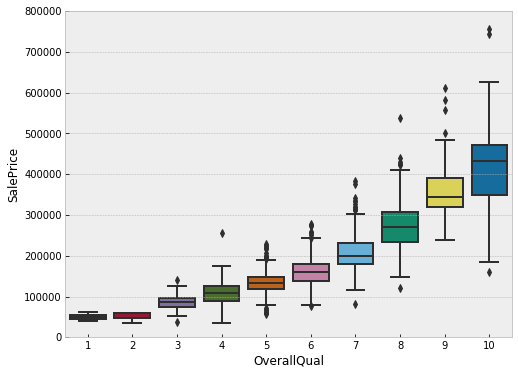

In [22]:
#box plot overallqual/saleprice
data = pd.concat([train_data['SalePrice'], train_data["OverallQual"]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = "OverallQual", y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000);

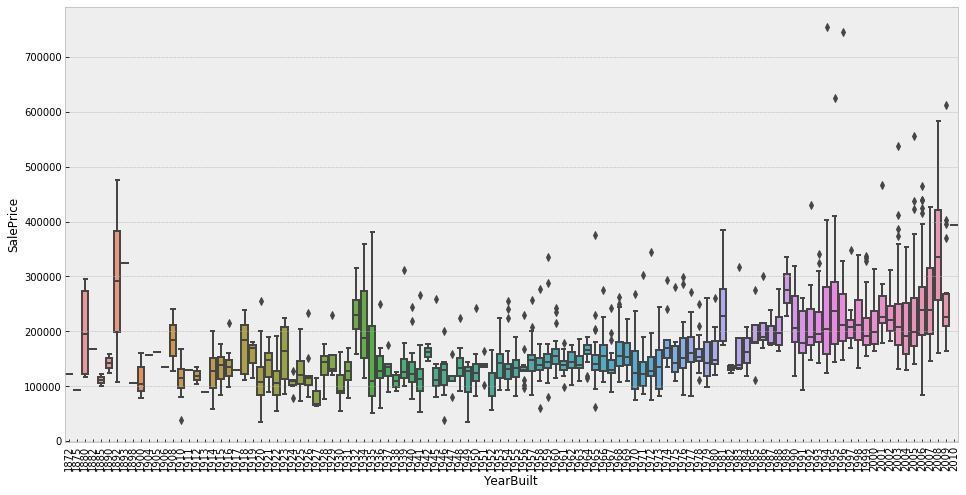

In [23]:
data = pd.concat([train_data['SalePrice'], train_data["YearBuilt"]], axis = 1)
f, ax = plt.subplots(figsize = (16, 8))
fig = sns.boxplot(x = "YearBuilt", y = "SalePrice", data = data)
#fig.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation = 90);

Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

### Correlation

Now we'll try to find which features are strongly correlated with SalePrice. We'll store them in a var called features_list. We'll reuse our df_num dataset to do so.

In [24]:
df_num_corr = train_data.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(features_list), features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

1. Plot the numerical features and see which ones have very few or explainable outliers
2. Remove the outliers from these features and see which one can have a good correlation without their outliers

Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the SalePrice.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.


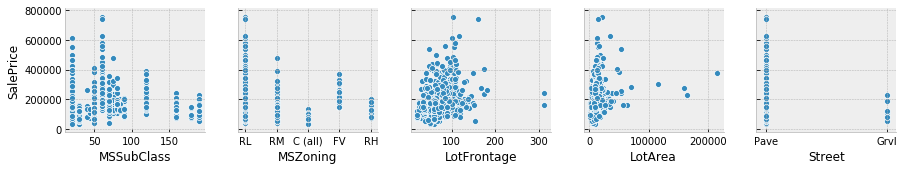

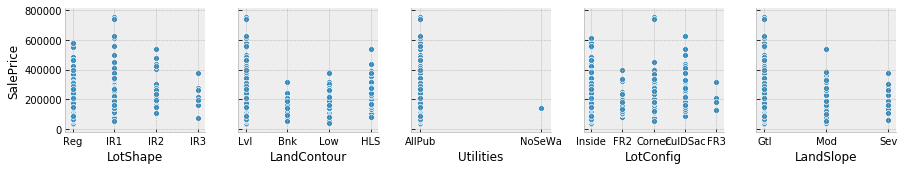

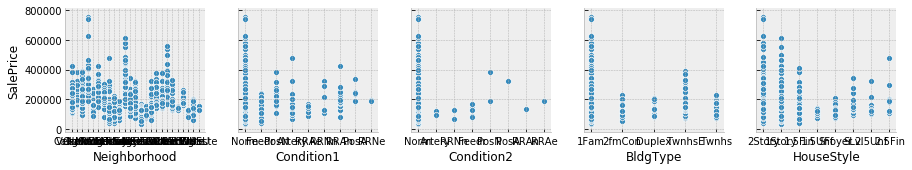

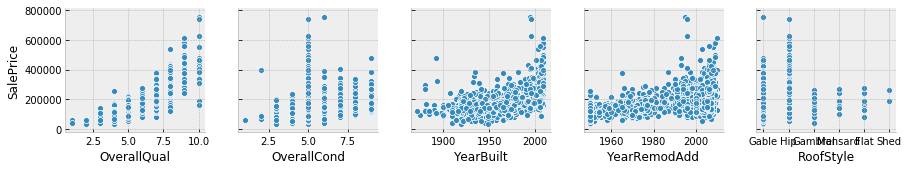

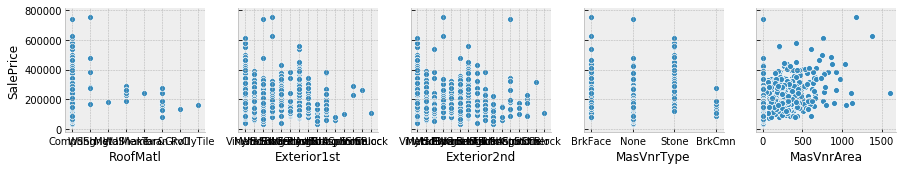

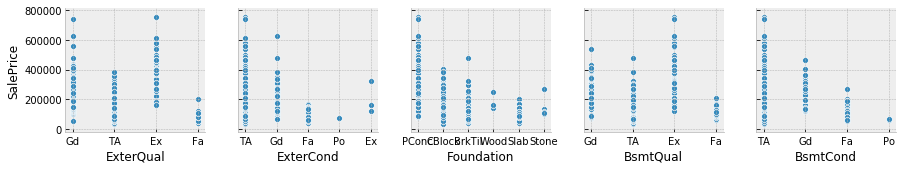

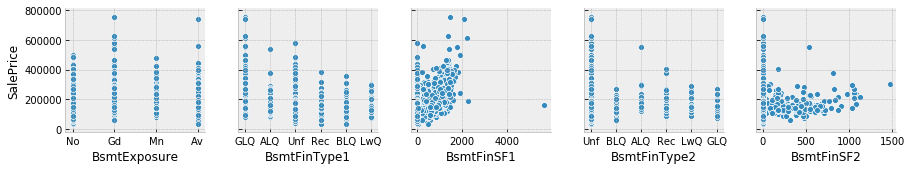

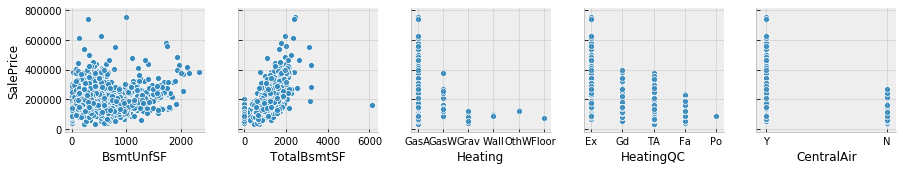

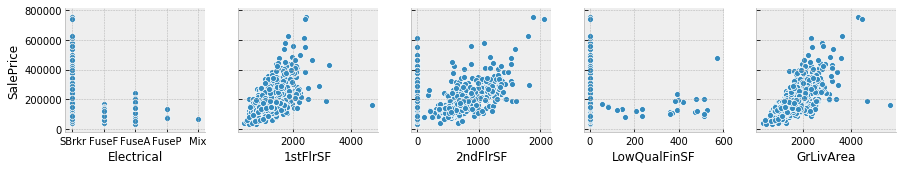

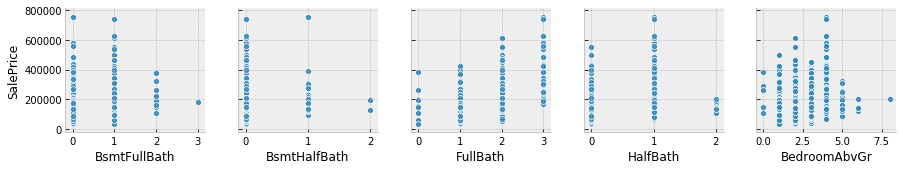

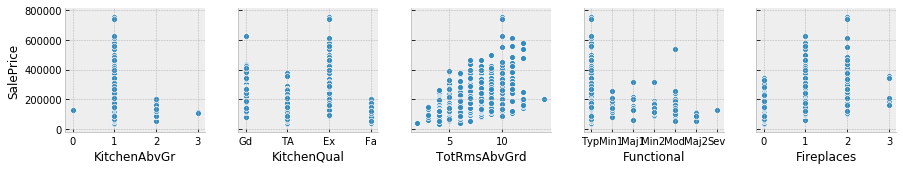

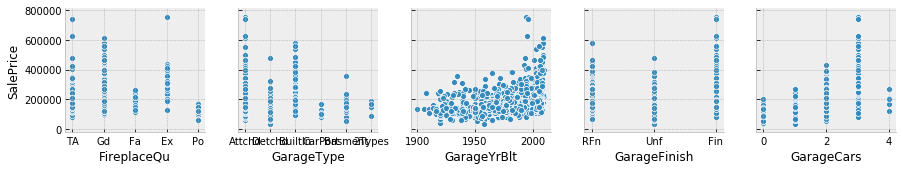

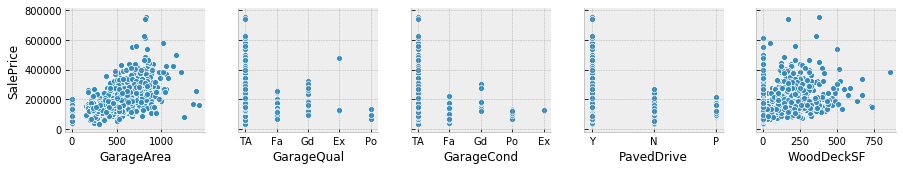

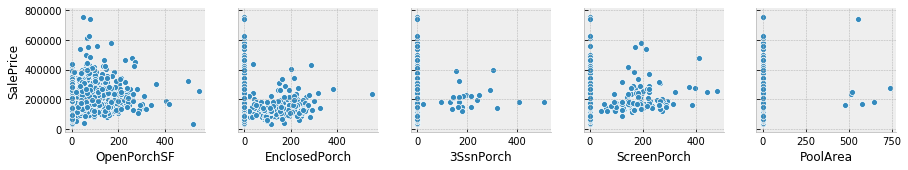

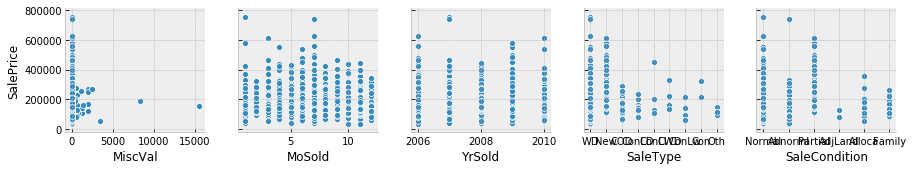

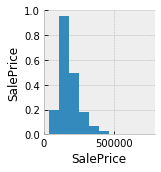

In [25]:
for i in range(0, len(train_data.columns), 5):
    sns.pairplot(data = train_data,
                x_vars = train_data.columns[i:i+5],
                y_vars = ['SalePrice'])

### Correlation matrix (heatmap)

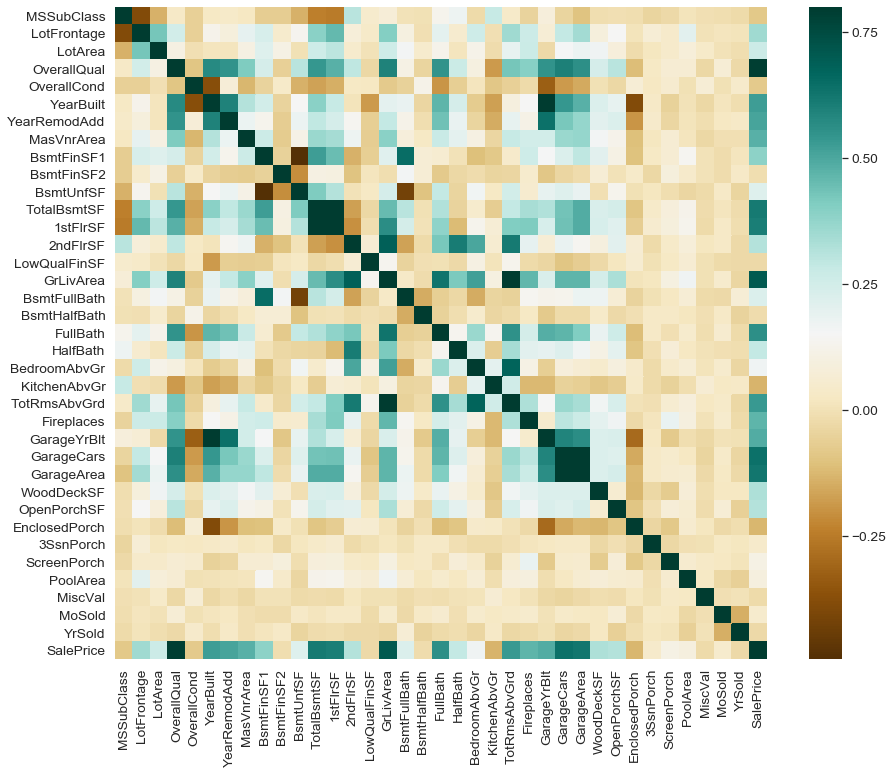

In [34]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(corrmat, vmax = .8, square = True, cmap = "BrBG")

Such heatmaps are the best way to get a quick overview of feature relationships.

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

#### 'SalePrice' correlation matrix (zoomed heatmap)

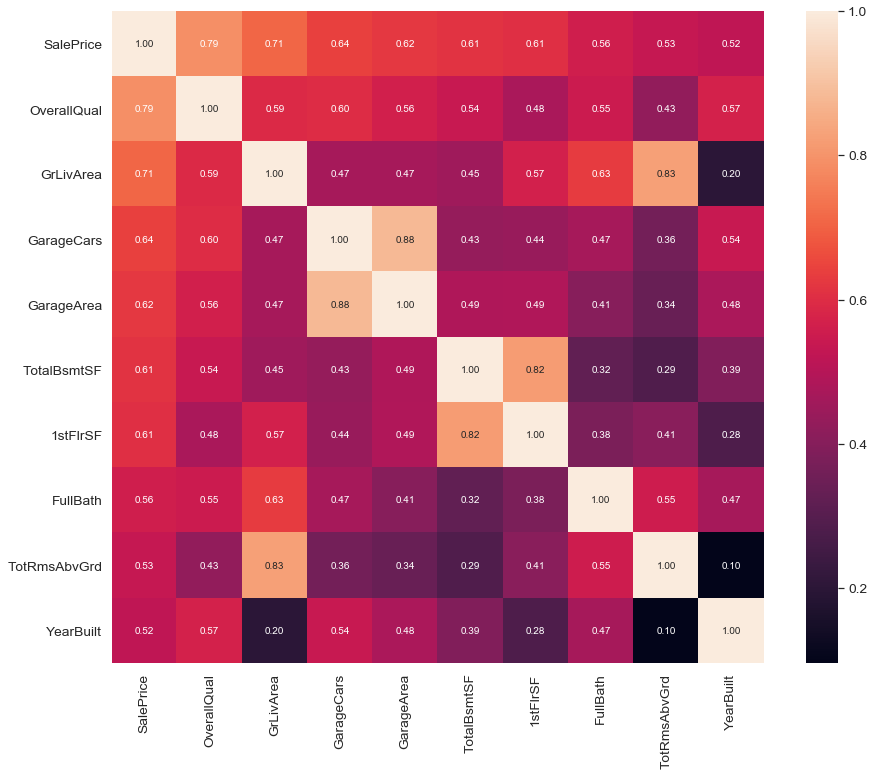

In [35]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale = 1.25)
plt.figure(figsize = (15, 12))
hm = sns.heatmap(cm, cbar = True, annot = True, 
                 square = True, fmt = '.2f', 
                 annot_kws = {'size': 10}, 
                 yticklabels = cols.values, 
                 xticklabels = cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

3. 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right.

4. 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.

5. It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

Lets get all the categorical features of our dataset and see if we can find some insight in them.

In [36]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = train_data[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [37]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [a for a in quantitative_features_list[:-1] + train_data.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in train_data.columns.tolist())]
df_categ = train_data[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

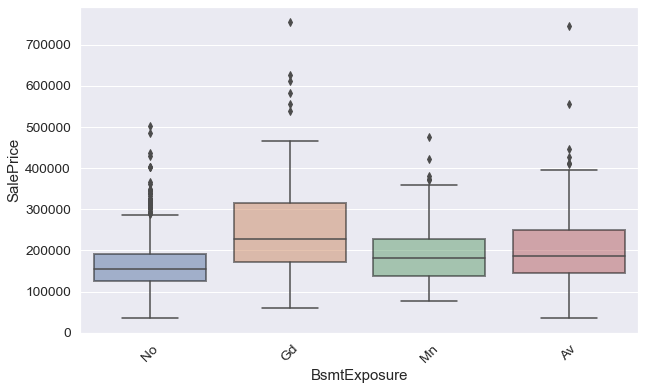

In [38]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df_categ)
plt.setp(ax.artists, alpha = .5, linewidth = 2, edgecolor = "k")
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

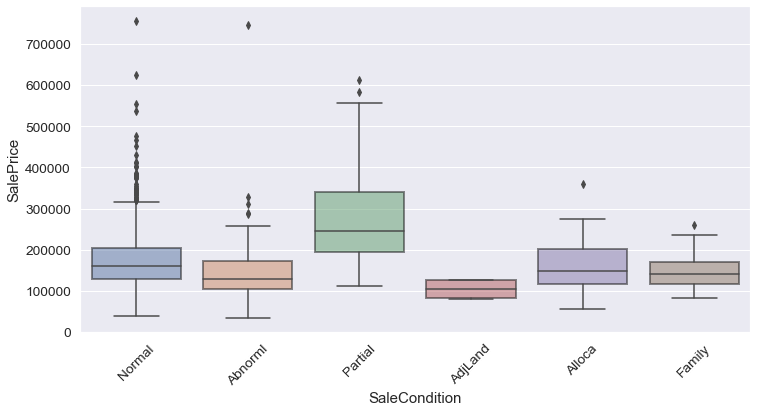

In [39]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df_categ)
plt.setp(ax.artists, alpha = .5, linewidth = 2, edgecolor = "k")
plt.xticks(rotation = 45)

### Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

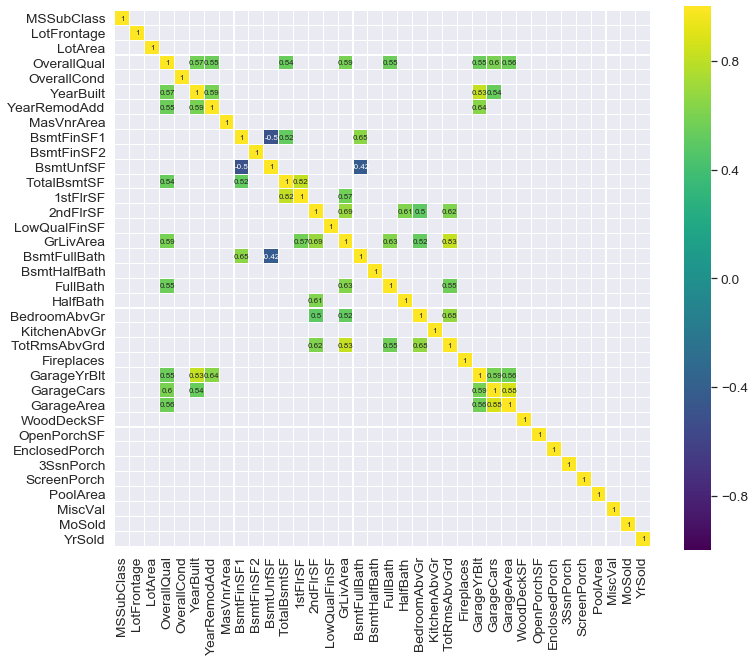

In [40]:
corr = df_num.drop('SalePrice', axis = 1).corr() # We already examined SalePrice correlations
plt.figure(figsize  =(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot = True, annot_kws = {"size": 8}, square = True);



A lot of features seems to be correlated between each other but some of them such as YearBuild/GarageYrBlt may just indicate a price inflation over the years. As for 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

Now for the ones which are less obvious we can see that:

1. There is a strong negative correlation between BsmtUnfSF (Unfinished square feet of basement area) and BsmtFinSF2 (Type 2 finished square feet). There is a definition of unfinished square feet here but as for a house of "Type 2", I can't tell what it really is.
2. HalfBath/2ndFlrSF is interesting and may indicate that people gives an importance of not having to rush downstairs in case of urgently having to go to the bathroom.